This is where we plot our experimental results.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
# Insert the path to the metrics data
control_var = 10
path_to_data = f"pfl/experimental_results/mnist_dp/mnist-dp-server_round_{control_var}-lr_0_01"

In [47]:
# List of pandas DataFrames to hold the metrics
metrics_dfs = []

for i in range(1, 4):
    # metrics = pd.read_csv("pfl/experimental_results/mnist_dp/mnist-dp-eps_7.csv")
    metrics = pd.read_csv(f'{path_to_data} ({i}).csv')
    metrics = metrics.dropna(subset=['Central val | accuracy']) # A DataFrame
    metrics_dfs.append(metrics['Central val | accuracy'])       # Append DataFrame to the list

accuracy_df = pd.concat(metrics_dfs, axis=1)

In [48]:
mean_accuracy = accuracy_df.mean(axis=1)
epochs = range(len(mean_accuracy))

Text(0.5, 1.0, 'MNIST - eps = 10, lr = 0.01')

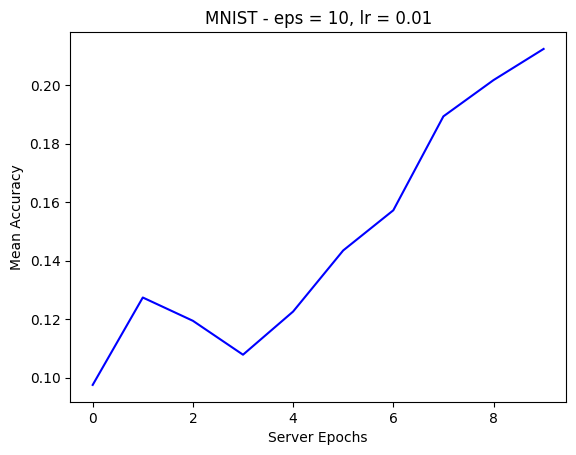

In [49]:
plt.plot(epochs, mean_accuracy, label='Mean Centralized Validation Accuracy', color='blue')
plt.xlabel('Server Epochs')
plt.ylabel('Mean Accuracy')
plt.title(f'MNIST - eps = {control_var}, lr = 0.01')

In [3]:
def extract_average(metric, path, count):
    metrics_dfs = []
    for i in range(1, count + 1):
        metrics = pd.read_csv(f'{path} ({i}).csv')
        metrics = metrics.dropna(subset=[metric])
        metrics_dfs.append(metrics[metric])
    return pd.concat(metrics_dfs, axis=1).mean(axis=1)  

# MNIST local epoch experiment

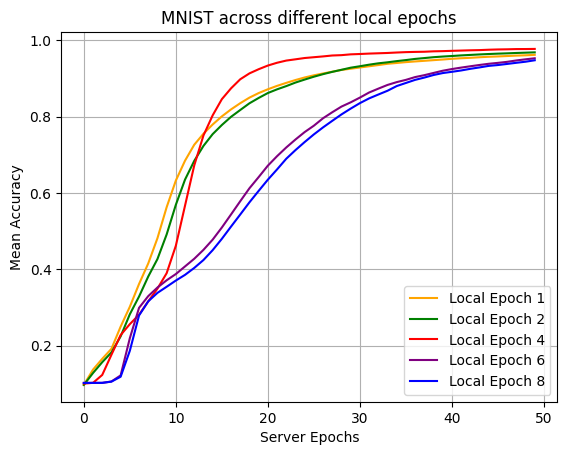

In [37]:
path = "pfl/experimental_results/mnist_no_dp/mnist-no_dp-local_epoch_"

mnist_local_epoch_1 = extract_average('Central val | accuracy', path + '1', 3)
mnist_local_epoch_2 = extract_average('Central val | accuracy', path + '2', 3)
mnist_local_epoch_4 = extract_average('Central val | accuracy', path + '4', 1)
mnist_local_epoch_6 = extract_average('Central val | accuracy', path + '6', 1)
mnist_local_epoch_8 = extract_average('Central val | accuracy', path + '8', 1)

assert len(mnist_local_epoch_1) == len(mnist_local_epoch_2) == len(mnist_local_epoch_4) == len(mnist_local_epoch_6) == len(mnist_local_epoch_8)

epochs = range(len(mnist_local_epoch_1))

plt.plot(epochs, mnist_local_epoch_1, label='Local Epoch 1', color='orange')
plt.plot(epochs, mnist_local_epoch_2, label='Local Epoch 2', color='green')
plt.plot(epochs, mnist_local_epoch_4, label='Local Epoch 4', color='red')
plt.plot(epochs, mnist_local_epoch_6, label='Local Epoch 6', color='purple')
plt.plot(epochs, mnist_local_epoch_8, label='Local Epoch 8', color='blue')
plt.xlabel('Server Epochs')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.title('MNIST across different local epochs')
plt.grid()

# MNIST DP server round experiment

Text(0.5, 1.0, 'MNIST - Varying Server Epochs across training instances')

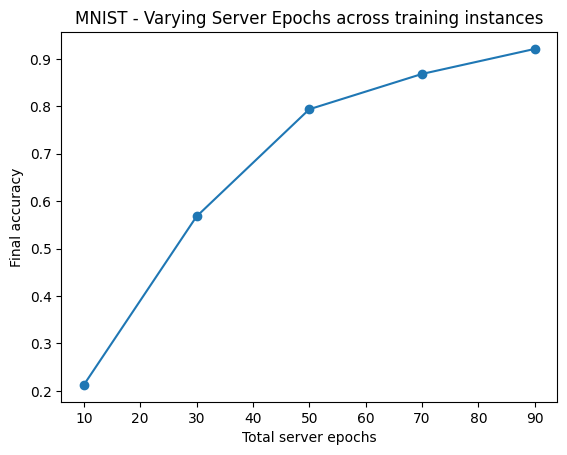

In [ ]:
path_prefix = "pfl/experimental_results/mnist_dp/mnist-dp-server_round_"
path_suffix = "-lr_0_01"

mnist_server_round_10 = extract_average('Central val | accuracy', path_prefix + "10" + path_suffix, 3)[-1:]
mnist_server_round_30 = extract_average('Central val | accuracy', path_prefix + "30" + path_suffix, 3)[-1:]
mnist_server_round_50 = extract_average('Central val | accuracy', path_prefix + "50" + path_suffix, 3)[-1:]
mnist_server_round_70 = extract_average('Central val | accuracy', path_prefix + "70" + path_suffix, 3)[-1:]
mnist_server_round_90 = extract_average('Central val | accuracy', path_prefix + "90" + path_suffix, 3)[-1:]

server_epocs = [10, 30, 50, 70, 90]
accuracies = [mnist_server_round_10, mnist_server_round_30, mnist_server_round_50, mnist_server_round_70, mnist_server_round_90]
plt.plot(server_epocs, accuracies, marker='o')
plt.xlabel('Total server epochs')
plt.ylabel('Final accuracy')
plt.title('MNIST - Varying Server Epochs across training instances')

Text(0.5, 1.0, 'MNIST - Varying Server Epochs across training instances')

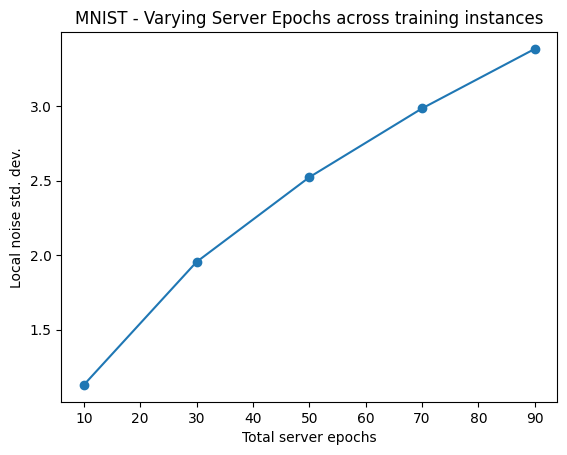

In [62]:
path_prefix = "pfl/experimental_results/mnist_dp/mnist-dp-server_round_"
path_suffix = "-lr_0_01"
metric = 'Local DP | DP noise std. dev.'

mnist_server_round_10 = extract_average(metric, path_prefix + "10" + path_suffix, 3)[-1:]
mnist_server_round_30 = extract_average(metric, path_prefix + "30" + path_suffix, 3)[-1:]
mnist_server_round_50 = extract_average(metric, path_prefix + "50" + path_suffix, 3)[-1:]
mnist_server_round_70 = extract_average(metric, path_prefix + "70" + path_suffix, 3)[-1:]
mnist_server_round_90 = extract_average(metric, path_prefix + "90" + path_suffix, 3)[-1:]

server_epocs = [10, 30, 50, 70, 90]
noises = [mnist_server_round_10, mnist_server_round_30, mnist_server_round_50, mnist_server_round_70, mnist_server_round_90]
plt.plot(server_epocs, noises, marker='o')
plt.xlabel('Total server epochs')
plt.ylabel('Local noise std. dev.')
plt.title('MNIST - Varying Server Epochs across training instances')

# MNIST DP experiment

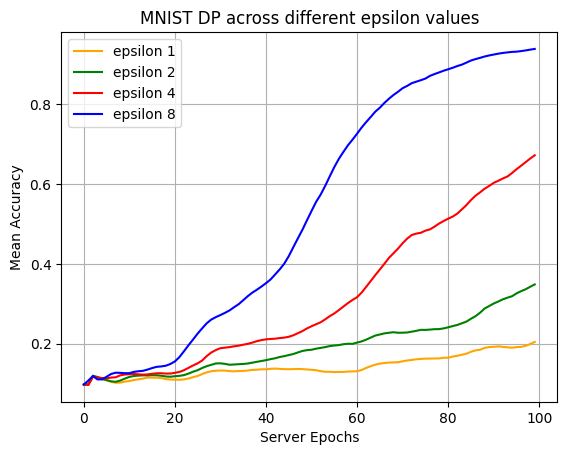

In [5]:
path_prefix = "pfl/experimental_results/mnist_dp/mnist-dp-eps_"
metric = "Central val | accuracy"
path_suffix = "-lr_0_01"

mnist_local_epsilon_1 = extract_average(metric, path_prefix + '1' + path_suffix, 3)
mnist_local_epsilon_2 = extract_average(metric, path_prefix + '2' + path_suffix, 3)
mnist_local_epsilon_4 = extract_average(metric, path_prefix + '4' + path_suffix, 3)
mnist_local_epsilon_8 = extract_average(metric, path_prefix + '8' + path_suffix, 3)

assert len(mnist_local_epsilon_1) == len(mnist_local_epsilon_2) == len(mnist_local_epsilon_4) == len(mnist_local_epsilon_8)

epochs = range(len(mnist_local_epsilon_1))

plt.plot(epochs, mnist_local_epsilon_1, label='epsilon 1', color='orange')
plt.plot(epochs, mnist_local_epsilon_2, label='epsilon 2', color='green')
plt.plot(epochs, mnist_local_epsilon_4, label='epsilon 4', color='red')
plt.plot(epochs, mnist_local_epsilon_8, label='epsilon 8', color='blue')
plt.xlabel('Server Epochs')
plt.ylabel('Mean Accuracy')
plt.legend()
plt.title('MNIST DP across different epsilon values')
plt.grid()

# MNIST Epsilon on x-axis. Accuracy on y-axis

In [ ]:
metric = "Central val | accuracy"
path_prefix = "pfl/experimental_results/mnist_dp/mnist-dp-lr_0_01-"
server_round_40 = "-server_round_40"
server_round_60 = "-server_round_60"
server_round_80 = "-server_round_80"

eps_1 = "eps_1"
eps_2 = "eps_2"
eps_4 = "eps_4"
eps_8 = "eps_8"

eps_1_server_round_40 = extract_average(metric, path_prefix + eps_1 + server_round_40, 3)[-1:]
eps_2_server_round_40 = extract_average(metric, path_prefix + eps_2 + server_round_40, 3)[-1:]
eps_4_server_round_40 = extract_average(metric, path_prefix + eps_4 + server_round_40, 3)[-1:]
eps_8_server_round_40 = extract_average(metric, path_prefix + eps_8 + server_round_40, 3)[-1:]

eps_1_server_round_60 = extract_average(metric, path_prefix + eps_1 + server_round_60, 3)[-1:]
eps_2_server_round_60 = extract_average(metric, path_prefix + eps_2 + server_round_60, 3)[-1:]
eps_4_server_round_60 = extract_average(metric, path_prefix + eps_4 + server_round_60, 3)[-1:]
eps_8_server_round_60 = extract_average(metric, path_prefix + eps_8 + server_round_60, 3)[-1:]

eps_1_server_round_80 = extract_average(metric, path_prefix + eps_1 + server_round_80, 3)[-1:]
eps_2_server_round_80 = extract_average(metric, path_prefix + eps_2 + server_round_80, 3)[-1:]
eps_4_server_round_80 = extract_average(metric, path_prefix + eps_4 + server_round_80, 3)[-1:]
eps_8_server_round_80 = extract_average(metric, path_prefix + eps_8 + server_round_80, 3)[-1:]

graph_server_round_40 = [eps_1_server_round_40, eps_2_server_round_40, eps_4_server_round_40, eps_8_server_round_40]
graph_server_round_60 = [eps_1_server_round_60, eps_2_server_round_60, eps_4_server_round_60, eps_8_server_round_60]
graph_server_round_80 = [eps_1_server_round_80, eps_2_server_round_80, eps_4_server_round_80, eps_8_server_round_80]

epsilons = [1, 2, 4, 8]
plt.plot(epsilons, graph_server_round_40, label='Server Round 40', marker='o')
plt.plot(epsilons, graph_server_round_60, label='Server Round 60', marker='o')
plt.plot(epsilons, graph_server_round_80, label='Server Round 80', marker='o')



# Debugging code

Text(0.5, 1.0, 'Mean Centralized Validation Accuracy Over Server Epochs')

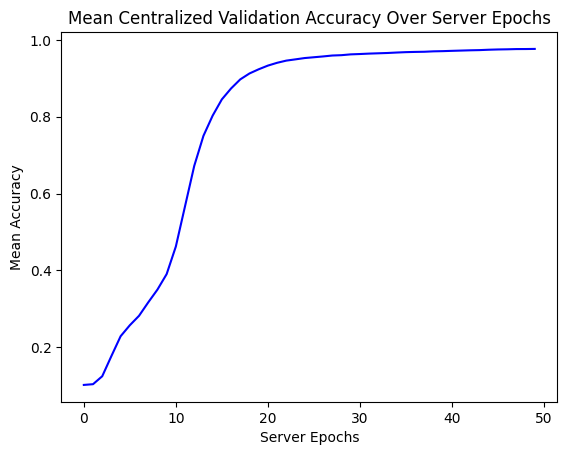

In [8]:
path_to_debug_data = "pfl/experimental_results/mnist_no_dp/mnist-optim_adam.csv"
metrics = pd.read_csv(path_to_debug_data)

accuracy = metrics['Central val | accuracy'].dropna()
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label='Mean Centralized Validation Accuracy', color='blue')
plt.xlabel('Server Epochs')
plt.ylabel('Mean Accuracy')
plt.title('Mean Centralized Validation Accuracy Over Server Epochs')